In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


/tmp/ipykernel_37296/69772053.py:14: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(x=df.index, y=df['passengers'], fmt='-', xdate=True)


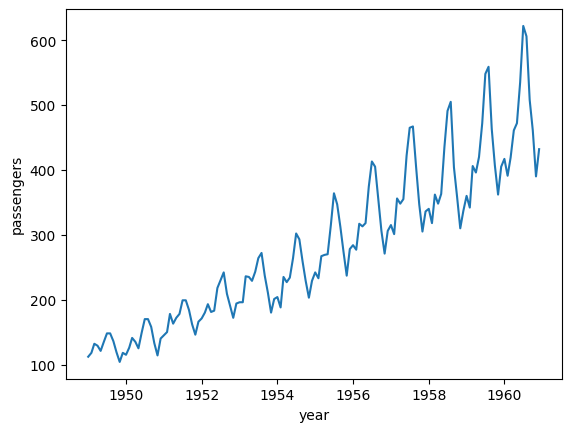

In [2]:
# Load data with separate month and year columns
df = pd.read_csv('AirPassengers_converted.csv', usecols=['year', 'month', 'passengers'], encoding='utf-8')

# Concatenate year and month into date column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

# Set date column as index
df.set_index('date', inplace=True)

# Remove year and month columns
df.drop(['year', 'month'], axis=1, inplace=True)

# Plot data
plt.plot_date(x=df.index, y=df['passengers'], fmt='-', xdate=True)
plt.xlabel('year')
plt.ylabel('passengers')
plt.show()


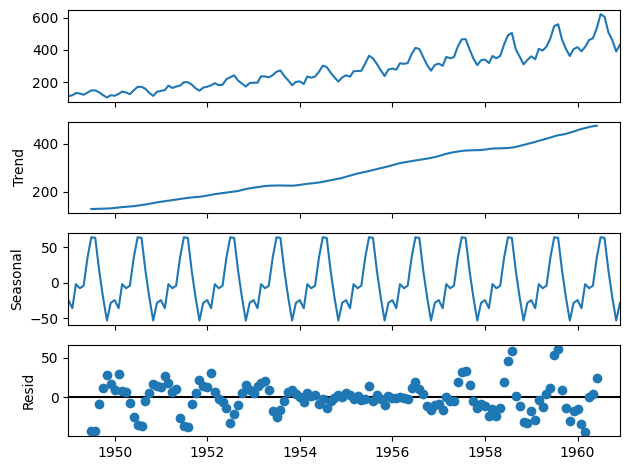

In [3]:
# Decompose time series
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

# Plot components
fig = decomposition.plot()
plt.show()


In [4]:
# Check for stationarity
result = sm.tsa.stattools.adfuller(df['passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 07 Apr 2025   AIC                           1394.683
Time:                        00:46:02   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

/tmp/ipykernel_37296/3742547761.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')


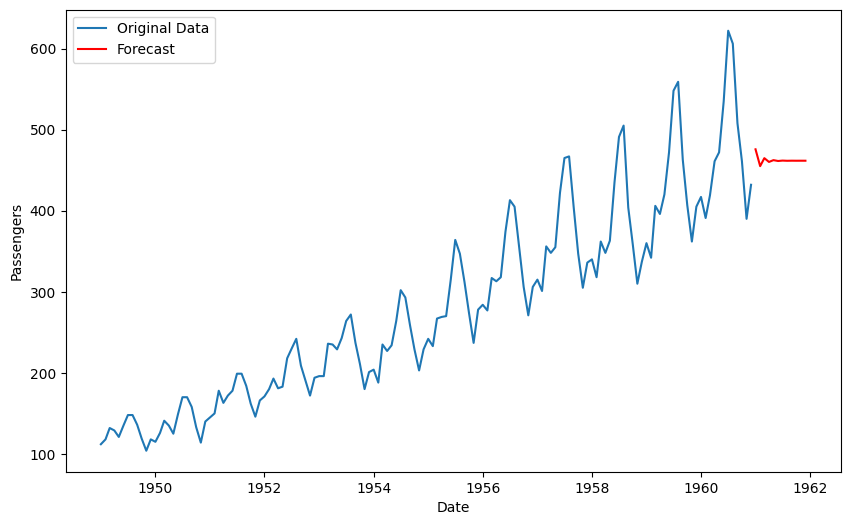

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['passengers'], order=(1, 1, 1))  # (p, d, q) 값을 조정할 수 있습니다.
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future values
forecast = model_fit.forecast(steps=12)  # 12개월 예측
print("Forecasted values:")
print(forecast)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['passengers'], label='Original Data')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

/home/elinlee/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_37296/3648898014.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), hw_forecast, label='Forecast (Exponential Smoothing)', color='green')


Forecasted values using Exponential Smoothing:
1961-01-01    444.209578
1961-02-01    419.618898
1961-03-01    458.906965
1961-04-01    489.465984
1961-05-01    495.573282
1961-06-01    552.209174
1961-07-01    628.111707
1961-08-01    610.508383
1961-09-01    509.369063
1961-10-01    456.290808
1961-11-01    389.201199
1961-12-01    433.542859
Freq: MS, dtype: float64


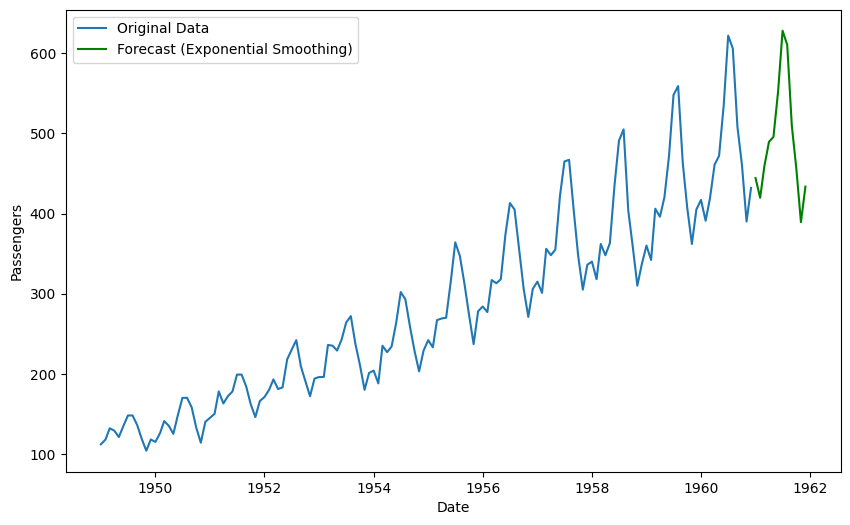

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
hw_model = ExponentialSmoothing(df['passengers'], seasonal='add', seasonal_periods=12).fit()

# Forecast future values
hw_forecast = hw_model.forecast(steps=12)  # Forecast for 12 months
print("Forecasted values using Exponential Smoothing:")
print(hw_forecast)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['passengers'], label='Original Data')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), hw_forecast, label='Forecast (Exponential Smoothing)', color='green')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()